<font size=5, color='black'>NBA 2020-2021 MVP frontrunners</font>

<font size=3>In this project I am trying to find out the top 10 players in the MVP race this season . A number of parameters have been used in order to find out the top 10 players in the league. This project does not predict the MVP , it only analyses the current data and finds out the player who is the leader in the MVP race at this point of time.</font>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<font size=5>Gathering and preparing the data</font>

In [2]:
#scraping and parsing the website

url = "https://www.basketball-reference.com/leagues/NBA_2021_per_game.html"
nba_data = requests.get(url).text
soup = BeautifulSoup(nba_data , 'html5lib')
url_advanced = "https://www.basketball-reference.com/leagues/NBA_2021_advanced.html"
advanced_data = requests.get(url_advanced).text
soup_advanced = BeautifulSoup(advanced_data ,'html5lib')

In [3]:
rows = soup.find_all('tr')
header_row = rows[0]
list_th = header_row.find_all('th')
columns = []
for th in list_th:
    columns.append(th.getText())
columns

['Rk',
 'Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [4]:
player_data = []
for i in range(1,len(rows)):
    table_rows = rows[i]
    list_th = table_rows.find_all('th')
    list_td = table_rows.find_all('td')
    list_td.append(list_th[0])
    list_td = list_td[-1:] + list_td[:-1]
    player_data.append(list_td)
players = []
for i in range(0,len(player_data)):
    temp_list = []
    for j in range(0,len(player_data[i])):
        temp_list.append(player_data[i][j].getText())
    players.append(temp_list)
players

[['1',
  'Precious Achiuwa',
  'PF',
  '21',
  'MIA',
  '58',
  '3',
  '11.9',
  '1.9',
  '3.6',
  '.538',
  '0.0',
  '0.0',
  '',
  '1.9',
  '3.6',
  '.538',
  '.538',
  '0.9',
  '1.8',
  '.515',
  '1.2',
  '2.2',
  '3.4',
  '0.5',
  '0.3',
  '0.5',
  '0.7',
  '1.5',
  '4.8'],
 ['2',
  'Jaylen Adams',
  'PG',
  '24',
  'MIL',
  '7',
  '0',
  '2.6',
  '0.1',
  '1.1',
  '.125',
  '0.0',
  '0.3',
  '.000',
  '0.1',
  '0.9',
  '.167',
  '.125',
  '0.0',
  '0.0',
  '',
  '0.0',
  '0.4',
  '0.4',
  '0.3',
  '0.0',
  '0.0',
  '0.0',
  '0.1',
  '0.3'],
 ['3',
  'Steven Adams',
  'C',
  '27',
  'NOP',
  '58',
  '58',
  '27.7',
  '3.3',
  '5.3',
  '.614',
  '0.0',
  '0.1',
  '.000',
  '3.3',
  '5.3',
  '.620',
  '.614',
  '1.0',
  '2.3',
  '.444',
  '3.7',
  '5.2',
  '8.9',
  '1.9',
  '0.9',
  '0.7',
  '1.3',
  '1.9',
  '7.6'],
 ['4',
  'Bam Adebayo',
  'C',
  '23',
  'MIA',
  '61',
  '61',
  '33.4',
  '7.1',
  '12.5',
  '.570',
  '0.0',
  '0.1',
  '.250',
  '7.1',
  '12.4',
  '.574',
  '.571',

In [5]:
player_df = pd.DataFrame(players)
player_df.columns = columns
player_df.rename(columns = {'Rk':'Index'}, inplace=True)
player_df.set_index('Index',inplace = True)
player_df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Index,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,PF,21,MIA,58,3,11.9,1.9,3.6,.538,...,.515,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,4.8
2,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,.125,...,,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
3,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,.614,...,.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
4,Bam Adebayo,C,23,MIA,61,61,33.4,7.1,12.5,.570,...,.800,2.2,6.7,9.0,5.3,1.2,1.0,2.7,2.3,18.9
5,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,.473,...,.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5


In [6]:
player_df.drop_duplicates(subset = 'Player' , keep = 'first' , inplace = True)
player_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536 entries, 1 to 535
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  535 non-null    object
 1   Pos     535 non-null    object
 2   Age     535 non-null    object
 3   Tm      535 non-null    object
 4   G       535 non-null    object
 5   GS      535 non-null    object
 6   MP      535 non-null    object
 7   FG      535 non-null    object
 8   FGA     535 non-null    object
 9   FG%     535 non-null    object
 10  3P      535 non-null    object
 11  3PA     535 non-null    object
 12  3P%     535 non-null    object
 13  2P      535 non-null    object
 14  2PA     535 non-null    object
 15  2P%     535 non-null    object
 16  eFG%    535 non-null    object
 17  FT      535 non-null    object
 18  FTA     535 non-null    object
 19  FT%     535 non-null    object
 20  ORB     535 non-null    object
 21  DRB     535 non-null    object
 22  TRB     535 non-null    object


In [7]:
players_traded_df = player_df.loc[player_df['Tm']=='TOT']
player_df=player_df[~player_df['Player'].isin(players_traded_df['Player'].unique())]
player_df.reset_index(drop=True , inplace=True)
player_df.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,58,3,11.9,1.9,3.6,.538,...,.515,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,4.8
1,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,.125,...,,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,.614,...,.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,Bam Adebayo,C,23,MIA,61,61,33.4,7.1,12.5,.570,...,.800,2.2,6.7,9.0,5.3,1.2,1.0,2.7,2.3,18.9
4,Ty-Shon Alexander,SG,22,PHO,14,0,3.0,0.1,0.8,.182,...,.500,0.1,0.4,0.5,0.3,0.0,0.1,0.1,0.1,0.4
5,Nickeil Alexander-Walker,SG,22,NOP,42,10,20.8,3.9,9.3,.419,...,.741,0.3,2.8,3.1,2.0,1.0,0.5,1.4,1.9,10.3
6,Grayson Allen,SG,25,MEM,50,38,25.2,3.5,8.3,.418,...,.868,0.4,2.8,3.2,2.2,0.9,0.2,1.0,1.4,10.6
7,Kyle Anderson,PF,27,MEM,65,65,27.3,4.4,9.6,.462,...,.779,0.8,5.0,5.8,3.6,1.2,0.8,1.2,1.8,12.3
8,Giannis Antetokounmpo,PF,26,MIL,57,57,33.0,10.2,18.2,.564,...,.688,1.6,9.5,11.1,5.9,1.2,1.3,3.6,2.8,28.2
9,Kostas Antetokounmpo,PF,23,LAL,15,0,3.7,0.2,0.7,.300,...,.462,0.3,1.0,1.3,0.1,0.1,0.3,0.7,0.5,0.8


In [8]:
player_df.dropna(axis=0,inplace=True)
player_df.reset_index(drop=True , inplace=True)
player_df['eFG%'].replace(r'^\s*$', np.nan, regex=True,inplace=True)
player_df['FT%'].replace(r'^\s*$', np.nan, regex=True,inplace=True)
player_df.head(20)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,58,3,11.9,1.9,3.6,.538,...,.515,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,4.8
1,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,.125,...,NaN,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
2,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,.614,...,.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
3,Bam Adebayo,C,23,MIA,61,61,33.4,7.1,12.5,.570,...,.800,2.2,6.7,9.0,5.3,1.2,1.0,2.7,2.3,18.9
4,Ty-Shon Alexander,SG,22,PHO,14,0,3.0,0.1,0.8,.182,...,.500,0.1,0.4,0.5,0.3,0.0,0.1,0.1,0.1,0.4
5,Nickeil Alexander-Walker,SG,22,NOP,42,10,20.8,3.9,9.3,.419,...,.741,0.3,2.8,3.1,2.0,1.0,0.5,1.4,1.9,10.3
6,Grayson Allen,SG,25,MEM,50,38,25.2,3.5,8.3,.418,...,.868,0.4,2.8,3.2,2.2,0.9,0.2,1.0,1.4,10.6
7,Kyle Anderson,PF,27,MEM,65,65,27.3,4.4,9.6,.462,...,.779,0.8,5.0,5.8,3.6,1.2,0.8,1.2,1.8,12.3
8,Giannis Antetokounmpo,PF,26,MIL,57,57,33.0,10.2,18.2,.564,...,.688,1.6,9.5,11.1,5.9,1.2,1.3,3.6,2.8,28.2
9,Kostas Antetokounmpo,PF,23,LAL,15,0,3.7,0.2,0.7,.300,...,.462,0.3,1.0,1.3,0.1,0.1,0.3,0.7,0.5,0.8


In [9]:
player_df=player_df.astype({"PTS":'float',
                 "PF":'float',
                 "TOV":'float',
                 "BLK":'float',
                 "STL":'float',
                 "AST":'float',
                 "FT%":'float',
                 "TRB":'float',
                 "MP":'float',
                 "GS":'int',
                 "G":'int'})

In [10]:
rows_advanced = soup_advanced.find_all('tr')
header_row = rows_advanced[0]
list_th = header_row.find_all('th')
columns = []
for th in list_th:
    columns.append(th.getText())
columns

['Rk',
 'Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 '\xa0',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 '\xa0',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP']

In [11]:
player_data_advanced = []
for i in range(1,len(rows_advanced)):
    table_rows = rows_advanced[i]
    list_th = table_rows.find_all('th')
    list_td = table_rows.find_all('td')
    list_td.append(list_th[0])
    list_td = list_td[-1:] + list_td[:-1]
    player_data_advanced.append(list_td)
players_adv = []
for i in range(0,len(player_data_advanced)):
    temp_list = []
    for j in range(0,len(player_data_advanced[i])):
        temp_list.append(player_data_advanced[i][j].getText())
    players_adv.append(temp_list)
players_adv

[['1',
  'Precious Achiuwa',
  'PF',
  '21',
  'MIA',
  '58',
  '692',
  '13.9',
  '.546',
  '.000',
  '.490',
  '11.8',
  '20.7',
  '16.3',
  '6.3',
  '1.3',
  '4.1',
  '13.8',
  '19.3',
  '',
  '0.2',
  '1.0',
  '1.2',
  '.084',
  '',
  '-3.5',
  '-0.8',
  '-4.3',
  '-0.4'],
 ['2',
  'Jaylen Adams',
  'PG',
  '24',
  'MIL',
  '7',
  '18',
  '-6.5',
  '.125',
  '.250',
  '.000',
  '0.0',
  '16.9',
  '8.8',
  '12.7',
  '0.0',
  '0.0',
  '0.0',
  '18.6',
  '',
  '-0.1',
  '0.0',
  '-0.1',
  '-0.249',
  '',
  '-14.9',
  '-5.0',
  '-19.8',
  '-0.1'],
 ['3',
  'Steven Adams',
  'C',
  '27',
  'NOP',
  '58',
  '1605',
  '15.2',
  '.596',
  '.010',
  '.438',
  '14.5',
  '20.4',
  '17.4',
  '9.1',
  '1.6',
  '2.3',
  '17.5',
  '11.7',
  '',
  '2.3',
  '1.7',
  '4.0',
  '.119',
  '',
  '-0.3',
  '-0.5',
  '-0.8',
  '0.5'],
 ['4',
  'Bam Adebayo',
  'C',
  '23',
  'MIA',
  '61',
  '2040',
  '22.9',
  '.628',
  '.010',
  '.459',
  '7.7',
  '22.5',
  '15.2',
  '26.9',
  '1.8',
  '3.3',
  '15.0',


In [12]:
player_df_adv = pd.DataFrame(players_adv)
player_df_adv.columns = columns
player_df_adv.rename(columns = {'Rk':'Index'}, inplace=True)
player_df_adv.set_index('Index',inplace = True)
player_df_adv.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
Index,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,PF,21,MIA,58,692,13.9,.546,.000,.490,...,,0.2,1.0,1.2,.084,,-3.5,-0.8,-4.3,-0.4
2,Jaylen Adams,PG,24,MIL,7,18,-6.5,.125,.250,.000,...,,-0.1,0.0,-0.1,-0.249,,-14.9,-5.0,-19.8,-0.1
3,Steven Adams,C,27,NOP,58,1605,15.2,.596,.010,.438,...,,2.3,1.7,4.0,.119,,-0.3,-0.5,-0.8,0.5
4,Bam Adebayo,C,23,MIA,61,2040,22.9,.628,.010,.459,...,,5.3,3.1,8.4,.198,,2.9,1.9,4.8,3.5
5,LaMarcus Aldridge,C,35,TOT,26,674,15.7,.556,.270,.159,...,,0.5,0.7,1.2,.082,,-0.2,-0.4,-0.6,0.2


In [13]:
player_df_adv.drop_duplicates(subset = 'Player' , keep = 'first' , inplace = True)
player_df_adv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536 entries, 1 to 535
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  535 non-null    object
 1   Pos     535 non-null    object
 2   Age     535 non-null    object
 3   Tm      535 non-null    object
 4   G       535 non-null    object
 5   MP      535 non-null    object
 6   PER     535 non-null    object
 7   TS%     535 non-null    object
 8   3PAr    535 non-null    object
 9   FTr     535 non-null    object
 10  ORB%    535 non-null    object
 11  DRB%    535 non-null    object
 12  TRB%    535 non-null    object
 13  AST%    535 non-null    object
 14  STL%    535 non-null    object
 15  BLK%    535 non-null    object
 16  TOV%    535 non-null    object
 17  USG%    535 non-null    object
 18          535 non-null    object
 19  OWS     535 non-null    object
 20  DWS     535 non-null    object
 21  WS      535 non-null    object
 22  WS/48   535 non-null    object


In [14]:
players_traded_df_adv = player_df.loc[player_df['Tm']=='TOT']
player_df_adv=player_df_adv[~player_df_adv['Player'].isin(players_traded_df_adv['Player'].unique())]
player_df_adv.reset_index(drop=True , inplace=True)
player_df_adv.head(10)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,58,692,13.9,.546,.000,.490,...,,0.2,1.0,1.2,.084,,-3.5,-0.8,-4.3,-0.4
1,Jaylen Adams,PG,24,MIL,7,18,-6.5,.125,.250,.000,...,,-0.1,0.0,-0.1,-0.249,,-14.9,-5.0,-19.8,-0.1
2,Steven Adams,C,27,NOP,58,1605,15.2,.596,.010,.438,...,,2.3,1.7,4.0,.119,,-0.3,-0.5,-0.8,0.5
3,Bam Adebayo,C,23,MIA,61,2040,22.9,.628,.010,.459,...,,5.3,3.1,8.4,.198,,2.9,1.9,4.8,3.5
4,LaMarcus Aldridge,C,35,TOT,26,674,15.7,.556,.270,.159,...,,0.5,0.7,1.2,.082,,-0.2,-0.4,-0.6,0.2
5,Ty-Shon Alexander,SG,22,PHO,14,42,0.0,.253,.727,.182,...,,-0.1,0.0,-0.1,-0.116,,-8.0,-2.6,-10.6,-0.1
6,Nickeil Alexander-Walker,SG,22,NOP,42,872,12.5,.525,.491,.139,...,,-0.2,0.9,0.7,.039,,-1.5,-0.1,-1.6,0.1
7,Grayson Allen,SG,25,MEM,50,1259,12.8,.586,.662,.220,...,,1.5,1.2,2.7,.101,,-0.4,-0.1,-0.5,0.5
8,Jarrett Allen,C,22,TOT,59,1735,20.5,.669,.036,.611,...,,4.2,1.9,6.2,.171,,1.6,-0.4,1.2,1.4
9,Al-Farouq Aminu,PF,30,TOT,23,434,8.9,.469,.374,.222,...,,-0.4,0.5,0.1,.011,,-5.0,1.0,-4.0,-0.2


In [15]:
player_df_adv.dropna(axis=0,inplace=True)
player_df_adv.reset_index(drop=True , inplace=True)
player_df_adv.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,58,692,13.9,.546,.000,.490,...,,0.2,1.0,1.2,.084,,-3.5,-0.8,-4.3,-0.4
1,Jaylen Adams,PG,24,MIL,7,18,-6.5,.125,.250,.000,...,,-0.1,0.0,-0.1,-0.249,,-14.9,-5.0,-19.8,-0.1
2,Steven Adams,C,27,NOP,58,1605,15.2,.596,.010,.438,...,,2.3,1.7,4.0,.119,,-0.3,-0.5,-0.8,0.5
3,Bam Adebayo,C,23,MIA,61,2040,22.9,.628,.010,.459,...,,5.3,3.1,8.4,.198,,2.9,1.9,4.8,3.5
4,LaMarcus Aldridge,C,35,TOT,26,674,15.7,.556,.270,.159,...,,0.5,0.7,1.2,.082,,-0.2,-0.4,-0.6,0.2


In [16]:
player_adv_df_final=player_df_adv[['Player','USG%','WS']]
player_df_final = pd.merge(player_df, player_adv_df_final, on='Player', how='left')
player_df_final=player_df_final.astype({'USG%':'float64',
                       'WS':'float64'})

<font size=5, color='black'>Finding the best player based on ppg , apg, rpg, spg, bpg , efg%, usg% and ws</font>

In [17]:
weightage = [1,2,3,3,2,2,-1,4,3,3]
df_temp=player_df_final[['G','eFG%','TRB','AST','STL','BLK','TOV','PTS','USG%','WS']]
df_mul=df_temp.mul(weightage , axis=1)
player_df_final['Total'] = (df_mul.sum(axis=1)/100).round(2)
final_df = player_df_final.sort_values(by='Total' , ascending =False).head(10)
final_df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,USG%,WS,Total
221,Nikola Jokić,C,25,DEN,68,68,35.0,10.2,18.1,.566,...,10.8,8.5,1.4,0.7,3.2,2.7,26.4,29.4,14.7,3.65
109,Luka Dončić,PG,21,DAL,62,62,34.7,10.0,20.6,.483,...,8.0,8.7,1.0,0.6,4.3,2.3,28.2,36.0,7.7,3.55
98,Stephen Curry,PG,32,GSW,60,60,34.0,10.4,21.4,.487,...,5.5,5.7,1.2,0.1,3.3,1.9,31.9,34.5,8.8,3.50
8,Giannis Antetokounmpo,PF,26,MIL,57,57,33.0,10.2,18.2,.564,...,11.1,5.9,1.2,1.3,3.6,2.8,28.2,32.9,9.4,3.49
124,Joel Embiid,C,26,PHI,49,49,31.4,9.3,18.0,.516,...,10.7,2.9,1.0,1.4,3.1,2.4,29.2,35.5,8.9,3.42
248,Damian Lillard,PG,30,POR,63,63,35.7,8.9,20.0,.444,...,4.2,7.6,1.0,0.3,3.1,1.6,28.6,31.6,9.5,3.36
33,Bradley Beal,SG,27,WAS,59,59,35.8,11.2,23.0,.489,...,4.7,4.4,1.2,0.4,3.1,2.3,31.4,34.0,6.0,3.32
359,Julius Randle,PF,26,NYK,67,67,37.2,8.5,18.4,.460,...,10.3,5.9,0.9,0.3,3.4,3.2,23.9,29.0,7.3,3.19
448,Zion Williamson,PF,20,NOP,61,61,33.2,10.4,17.0,.611,...,7.2,3.7,0.9,0.6,2.7,2.2,27.0,29.8,8.8,3.18
456,Trae Young,PG,22,ATL,59,59,34.1,7.7,17.7,.436,...,3.9,9.5,0.9,0.2,4.2,1.8,25.4,32.9,6.7,3.18


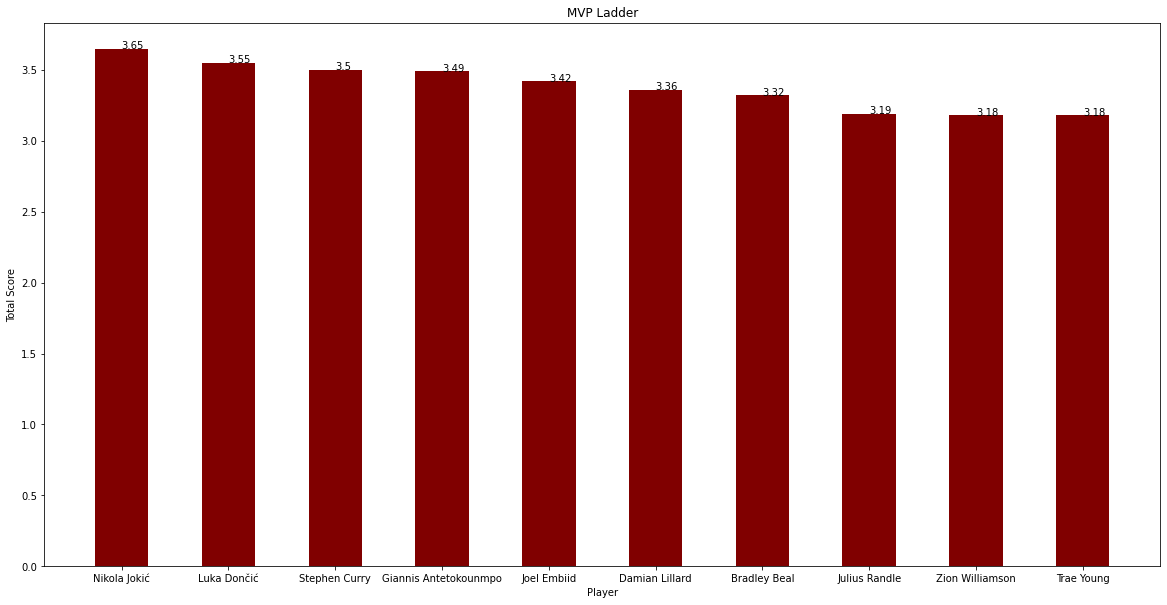

In [18]:
%matplotlib inline
plt.figure(figsize=(20,10))
plt.bar(final_df['Player'],final_df['Total'], color='maroon' , width = 0.5)
plt.title('MVP Ladder')
plt.xlabel('Player')
plt.ylabel('Total Score')
for index,value in enumerate(final_df['Total'].round(2)):
    plt.text(index,value,str(value))

plt.show()

<font size=5> As per the analysis of the weighted totals , Nikola Jokic is the frontrunner in the MVP race</font>

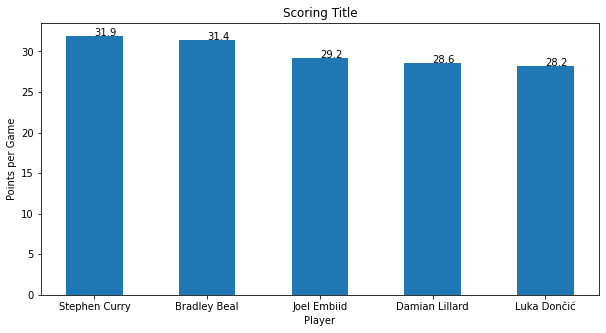

In [19]:
#Categorical Leaders
player_df_categorical=player_df.loc[player_df['G']>40]
scoring_df_top5 = player_df_categorical.sort_values(by= 'PTS', ascending=False).head(5)
rebound_df_top5 = player_df_categorical.sort_values(by='TRB', ascending=False).head(5)
assist_df_top5 =player_df_categorical.sort_values(by='AST', ascending=False).head(5)
blocks_df_top5 = player_df_categorical.sort_values(by='BLK', ascending=False).head(5)
steals_df_top5 = player_df_categorical.sort_values(by='STL', ascending=False).head(5)


#plot1
plt.figure(figsize=(10,5))
plt.bar(scoring_df_top5['Player'],scoring_df_top5['PTS'] ,width=0.5)
plt.title('Scoring Title')
plt.xlabel('Player')
plt.ylabel('Points per Game')
for index,value in enumerate(scoring_df_top5['PTS']):
    plt.text(index,value,str(value))

plt.show()

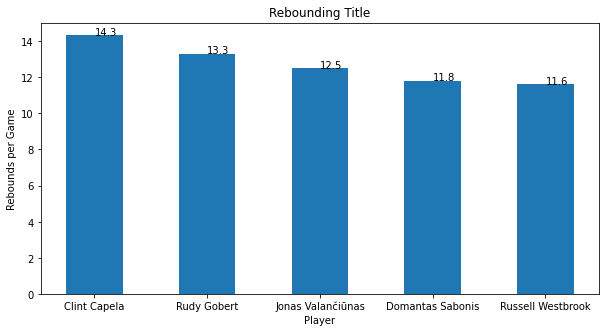

In [20]:
#plot2
plt.figure(figsize=(10,5))
plt.bar(rebound_df_top5['Player'],rebound_df_top5['TRB'] ,width=0.5)
plt.title('Rebounding Title')
plt.xlabel('Player')
plt.ylabel('Rebounds per Game')
for index,value in enumerate(rebound_df_top5['TRB']):
    plt.text(index,value,str(value))

plt.show()

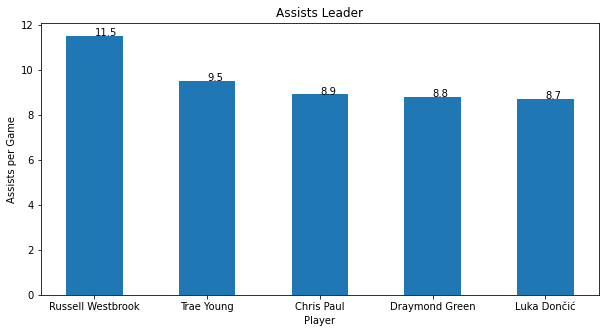

In [21]:
#plot3
plt.figure(figsize=(10,5))
plt.bar(assist_df_top5['Player'],assist_df_top5['AST'] ,width=0.5)
plt.title('Assists Leader')
plt.xlabel('Player')
plt.ylabel('Assists per Game')
for index,value in enumerate(assist_df_top5['AST']):
    plt.text(index,value,str(value))

plt.show()

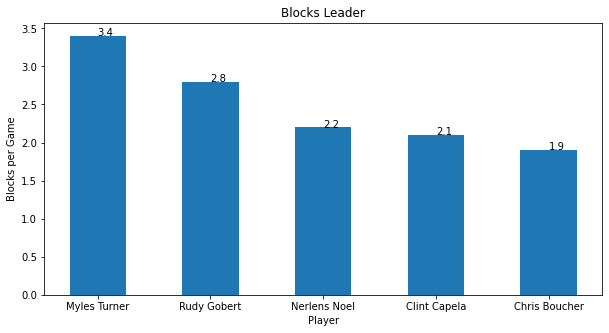

In [22]:
#plot4
plt.figure(figsize=(10,5))
plt.bar(blocks_df_top5['Player'],blocks_df_top5['BLK'] ,width=0.5)
plt.title('Blocks Leader')
plt.xlabel('Player')
plt.ylabel('Blocks per Game')
for index,value in enumerate(blocks_df_top5['BLK']):
    plt.text(index,value,str(value))

plt.show()

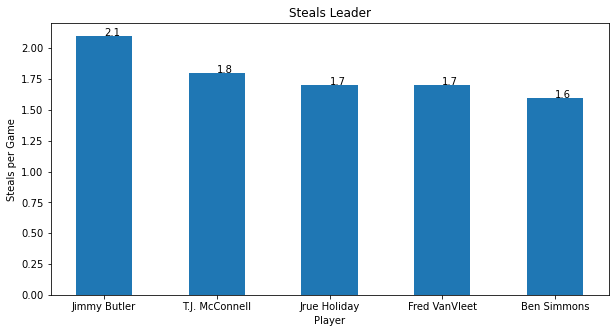

In [23]:
#plot5
plt.figure(figsize=(10,5))
plt.bar(steals_df_top5['Player'],steals_df_top5['STL'] ,width=0.5)
plt.title('Steals Leader')
plt.xlabel('Player')
plt.ylabel('Steals per Game')
for index,value in enumerate(steals_df_top5['STL']):
    plt.text(index,value,str(value))

plt.show()